In [3]:
!pip install VESIcal
import sys
sys.path.append(r'..')
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
#plt.rcParams["mathtext.default"] = "regular"
#plt.rcParams["mathtext.fontset"] = "arial"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Loading Cassidy data - data, my file

In [5]:
Cassidy = v.BatchFile(r'../Figure_17_comp_vs_cali/Andesite_MIs_Calibration_Data.xlsx', sheet_name='Cassidy_MI', input_type='wtpercent')
dataCassidy = Cassidy.get_data()

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
satPs_wtemps_Magmasat= Cassidy.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps_Shish= Cassidy.calculate_saturation_pressure(temperature="Temp", model="ShishkinaIdealMixing")
satPs_wtemps_IM= Cassidy.calculate_saturation_pressure(temperature="Temp", model="IaconoMarziano")
satPs_wtemps_IM_An= Cassidy.calculate_saturation_pressure(temperature="Temp", model="IaconoMarziano", 
                                                          coeffs="anhydrous")
satPs_wtemps_Dixon= Cassidy.calculate_saturation_pressure(temperature="Temp", model="Dixon")
satPs_wtemps_Liu= Cassidy.calculate_saturation_pressure(temperature="Temp", model="Liu")

[==                  ] 12%  Working on sample SSH4_1                            

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[====================] 100%  Working on sample SSH4_3                            


/opt/conda/lib/python3.8/site-packages/VESIcal/model_classes.py:398: RuntimeWarning: Saturation pressure not found.
  xx0 = model.calculate_saturation_pressure(sample=sample,


# Calculating medians for text

In [7]:
np.median(satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'])

2020.0

In [8]:
np.median(satPs_wtemps_Liu['SaturationP_bars_VESIcal'])

2123.5020023552734

In [9]:
np.median(satPs_wtemps_Magmasat['PapaleWebApp(MPA)']*10)


2170.441

In [10]:
np.median(dataCassidy['SatPRhyoliteVolatileCalc'])

2225.5

In [11]:
np.median(dataCassidy['SatPRhyoliteVolatileCalc'])/(9.8*2500)

0.09083673469387755

In [12]:
np.median(satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

3052.658516160242

In [13]:
np.median(satPs_wtemps_Shish['SaturationP_bars_VESIcal'])

3009.6099782014676

In [14]:
np.median(satPs_wtemps_IM['SaturationP_bars_VESIcal'])

5461.5252053083295

In [15]:
np.median(satPs_wtemps_IM_An['SaturationP_bars_VESIcal'])

4074.7774657324208

# Loading Atlas stuff - Myfile4, data4

In [16]:
########################### Anhydrous calculation
Atlas = v.BatchFile(r'../Figure_17_comp_vs_cali/Andesite_MIs_Calibration_Data.xlsx', sheet_name='Atlas_MI', input_type='wtpercent')
dataAtlas = Atlas.get_data()

satPs_wtemps_Magmasat_Atlas= Atlas.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps_Shish_Atlas= Atlas.calculate_saturation_pressure(temperature="Temp", model="ShishkinaIdealMixing")
satPs_wtemps_IM_Atlas= Atlas.calculate_saturation_pressure(temperature="Temp", model="IaconoMarziano")
satPs_wtemps_IM_Atlas_An= Atlas.calculate_saturation_pressure(temperature="Temp", model="IaconoMarziano", coeffs="anhydrous")
satPs_wtemps_Dixon_Atlas= Atlas.calculate_saturation_pressure(temperature="Temp", model="Dixon")
satPs_wtemps_Liu_Atlas= Atlas.calculate_saturation_pressure(temperature="Temp", model="Liu")

[====================] 100%  Working on sample 34                               


# Calculating medians for text

In [17]:
np.median(satPs_wtemps_Magmasat_Atlas['PapaleWebApp(MPA)']*10)


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


867.5

In [18]:
# Medians
np.median(satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'])

1025.0

In [19]:
# Percentage difference
np.median(satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'])/np.median(dataAtlas['SatPRhyoliteVolatileCalc'])
np.median(satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'])/100000*np.median(satPs_wtemps_Magmasat_Atlas['PapaleWebApp(MPA)'])



0.8891875

In [20]:
# Percentage difference
np.median(satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'])/np.median(dataAtlas['SatPRhyoliteVolatileCalc'])

0.7432922407541697

In [21]:
# Medians
np.median(satPs_wtemps_Shish_Atlas['SaturationP_bars_VESIcal'])

3685.3519887240323

In [22]:
# Medians
np.median(satPs_wtemps_IM_Atlas['SaturationP_bars_VESIcal'])

1542.0747145327027

In [23]:
np.median(satPs_wtemps_IM_Atlas_An['SaturationP_bars_VESIcal'])

1022.6765429974139

In [24]:
# Medians
np.median(satPs_wtemps_Dixon_Atlas['SaturationP_bars_VESIcal'])

1433.7387012389022

In [25]:
np.median(dataAtlas['SatPRhyoliteVolatileCalc'])

1379.0

In [26]:
# Making CDF plots for Cassidy ####################################

XPapale_online_sorted=np.sort(satPs_wtemps_Magmasat['PapaleWebApp(MPA)']*10)
# Magmasat 
XMagmasat_sorted=np.sort(satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'])
# Shishkina
XShish_sorted=np.sort(satPs_wtemps_Shish['SaturationP_bars_VESIcal'])
# IM
XIM_sorted=np.sort(satPs_wtemps_IM['SaturationP_bars_VESIcal'])
# An hy
XIM_sorted_An=np.sort(satPs_wtemps_IM_An['SaturationP_bars_VESIcal'])

# Liu
XLiu_sorted=np.sort(satPs_wtemps_Liu['SaturationP_bars_VESIcal'])
# Dixon
XDixon_sorted=np.sort(satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])
# RhyoliteVolatileCalc
XVCR_sorted=np.sort(dataCassidy['SatPRhyoliteVolatileCalc'])

# Making CDF plots for Cassidy ####################################

# Magmasat 
XMagmasat_sorted_Atlas=np.sort(satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'])
# Shishkina
XShish_sorted_Atlas=np.sort(satPs_wtemps_Shish_Atlas['SaturationP_bars_VESIcal'])
# IM
XIM_sorted_Atlas=np.sort(satPs_wtemps_IM_Atlas['SaturationP_bars_VESIcal'])
# IM An
XIM_sorted_Atlas_An=np.sort(satPs_wtemps_IM_Atlas_An['SaturationP_bars_VESIcal'])

# Liu
XLiu_sorted_Atlas=np.sort(satPs_wtemps_Liu_Atlas['SaturationP_bars_VESIcal'])
# Dixon
XDixon_sorted_Atlas=np.sort(satPs_wtemps_Dixon_Atlas['SaturationP_bars_VESIcal'])
# RhyoliteVolatileCalc
XVCR_sorted_Atlas=np.sort(dataAtlas['SatPRhyoliteVolatileCalc'])
#
XPapale_online_sorted_Atlas=np.sort(satPs_wtemps_Magmasat_Atlas['PapaleWebApp(MPA)']*10)



findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


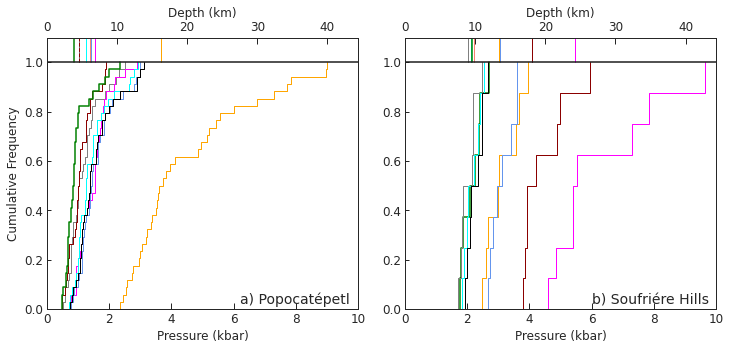

In [27]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 5))

#smaller plot figure
xlim2=0 #4000
xlim4=10000
#Zoomedoutfigure
xlim1=0 #1500
xlim3=10000

ax3 = ax1.twiny()
ax4 = ax2.twiny()
ax3.set_xlim([xlim1*100/(9.8*2300), xlim3*100/(9.8*2300)]) # this is the twin of ax1 - needs to be between 1500 and 10,000
ax4.set_xlim([xlim2*100/(9.8*2300), xlim3*100/(9.8*2300)]) # this is the twin of ax1 - needs to be between 1500 and 10,000
b=1

ax1.step(10**(-3)*np.concatenate([XPapale_online_sorted, XPapale_online_sorted[[-1]]]),
         np.arange(XPapale_online_sorted.size+1)/XPapale_online_sorted.size, color='green', linewidth=1.5*b)#, linestyle='dotted')
ax1.step(10**(-3)*np.concatenate([XMagmasat_sorted, XMagmasat_sorted[[-1]]]),
         np.arange(XMagmasat_sorted.size+1)/XMagmasat_sorted.size, color='grey', linewidth=b)
ax1.step(10**(-3)*np.concatenate([XShish_sorted, XShish_sorted[[-1]]]),
         np.arange(XShish_sorted.size+1)/XShish_sorted.size, color='orange', linewidth=b)
ax1.step(10**(-3)*np.concatenate([XIM_sorted, XIM_sorted[[-1]]]),
         np.arange(XIM_sorted.size+1)/XIM_sorted.size, color='magenta', linewidth=b)

ax1.step(10**(-3)*np.concatenate([XIM_sorted_An, XIM_sorted_An[[-1]]]),
         np.arange(XIM_sorted_An.size+1)/XIM_sorted_An.size, color='darkred', linewidth=b)#, linestyle='dashed')
ax1.step(10**(-3)*np.concatenate([XLiu_sorted, XLiu_sorted[[-1]]]),
         np.arange(XLiu_sorted.size+1)/XLiu_sorted.size, color='cyan', linewidth=b)
ax1.step(10**(-3)*np.concatenate([XDixon_sorted, XDixon_sorted[[-1]]]),
         np.arange(XDixon_sorted.size+1)/XDixon_sorted.size, color='cornflowerblue', linewidth=b)
ax1.step(10**(-3)*np.concatenate([XVCR_sorted, XVCR_sorted[[-1]]]),
         np.arange(XVCR_sorted.size+1)/XVCR_sorted.size, color='black', linewidth=b)
ax1.set_xlim([xlim1, xlim3])         


########################### Plotting medians
ax1.plot([0, 10**(-3)*10000], [1, 1], color='k', linewidth=1.5, zorder=10)
ax2.plot([0, 10**(-3)*10000], [1, 1], color='k', linewidth=1.5, zorder=10)


############### Atlas
ax2.step(10**(-3)*np.concatenate([XMagmasat_sorted_Atlas, XMagmasat_sorted_Atlas[[-1]]]),
         np.arange(XMagmasat_sorted_Atlas.size+1)/XMagmasat_sorted_Atlas.size, color='grey', linewidth=b)
ax2.step(10**(-3)*np.concatenate([XShish_sorted_Atlas, XShish_sorted_Atlas[[-1]]]),
         np.arange(XShish_sorted_Atlas.size+1)/XShish_sorted_Atlas.size, color='orange', linewidth=b)
ax2.step(10**(-3)*np.concatenate([XIM_sorted_Atlas, XIM_sorted_Atlas[[-1]]]),
         np.arange(XIM_sorted_Atlas.size+1)/XIM_sorted_Atlas.size, color='magenta', linewidth=b)
ax2.step(10**(-3)*np.concatenate([XIM_sorted_Atlas_An, XIM_sorted_Atlas_An[[-1]]]),
         np.arange(XIM_sorted_Atlas_An.size+1)/XIM_sorted_Atlas_An.size, color='darkred', linewidth=b)#, linestyle='dashed')

ax2.step(10**(-3)*np.concatenate([XLiu_sorted_Atlas, XLiu_sorted_Atlas[[-1]]]),
         np.arange(XLiu_sorted_Atlas.size+1)/XLiu_sorted_Atlas.size, color='cyan', linewidth=b)
ax2.step(10**(-3)*np.concatenate([XDixon_sorted_Atlas, XDixon_sorted_Atlas[[-1]]]),
         np.arange(XDixon_sorted_Atlas.size+1)/XDixon_sorted_Atlas.size, color='cornflowerblue', linewidth=b)
ax2.step(10**(-3)*np.concatenate([XVCR_sorted_Atlas, XVCR_sorted_Atlas[[-1]]]),
         np.arange(XVCR_sorted_Atlas.size+1)/XVCR_sorted_Atlas.size, color='black', linewidth=b)  
ax2.step(10**(-3)*np.concatenate([XPapale_online_sorted_Atlas, XPapale_online_sorted_Atlas[[-1]]]),
         np.arange(XPapale_online_sorted_Atlas.size+1)/XPapale_online_sorted_Atlas.size, color='green', linewidth=1.5*b)#, linestyle='dotted')


b=1
ax1.plot([10**(-3)*np.median(XMagmasat_sorted), 10**(-3)*np.median(XMagmasat_sorted)], [1, 1.1], color='grey', linewidth=b)
ax1.plot([10**(-3)*np.median(XDixon_sorted), 10**(-3)*np.median(XDixon_sorted)], [1, 1.1], color='cornflowerblue', linewidth=b)
ax1.plot([10**(-3)*np.median(XVCR_sorted), 10**(-3)*np.median(XVCR_sorted)], [1, 1.1], color='salmon', linewidth=b)
ax1.plot([10**(-3)*np.median(XShish_sorted), 10**(-3)*np.median(XShish_sorted)], [1, 1.1], color='orange', linewidth=b)
ax1.plot([10**(-3)*np.median(XLiu_sorted), 10**(-3)*np.median(XLiu_sorted)], [1, 1.1], color='cyan', linewidth=b)
ax1.plot([10**(-3)*np.median(XIM_sorted), 10**(-3)*np.median(XIM_sorted)], [1, 1.1], color='magenta', linewidth=b)
ax1.plot([10**(-3)*np.median(XIM_sorted_An), 10**(-3)*np.median(XIM_sorted_An)], [1, 1.1], color='darkred', linewidth=b)# linestyle='dashed')
## Alllisons suggestion
z=30
# ax1.scatter([10**(-3)*np.median(XMagmasat_sorted), 10**(-3)*np.median(XMagmasat_sorted)], [1, 1.1], marker='s', facecolor='grey', edgecolor='k', s=z)
# # ax1.scatter([10**(-3)*np.median(XDixon_sorted), 10**(-3)*np.median(XDixon_sorted)], [1, 1.1], color='cornflowerblue',  marker='s', size=z)
# # ax1.scatter([10**(-3)*np.median(XVCR_sorted), 10**(-3)*np.median(XVCR_sorted)], [1, 1.1], color='salmon',   marker='s', size=z)
# # ax1.scatter([10**(-3)*np.median(XShish_sorted), 10**(-3)*np.median(XShish_sorted)], [1, 1.1], color='orange',  marker='s', size=z)
# # ax1.scatter([10**(-3)*np.median(XLiu_sorted), 10**(-3)*np.median(XLiu_sorted)], [1, 1.1], color='cyan',  marker='s', size=z)
# # ax1.scatter([10**(-3)*np.median(XIM_sorted), 10**(-3)*np.median(XIM_sorted)], [1, 1.1], color='magenta',  marker='s', size=z)
# # ax1.scatter([10**(-3)*np.median(XIM_sorted_An), 10**(-3)*np.median(XIM_sorted_An)], [1, 1.1], color='darkred',  marker='s', size=z)






ax1.plot([10**(-3)*np.median(XPapale_online_sorted), 10**(-3)*np.median(XPapale_online_sorted)], [1, 1.1], color='green', linewidth=1.5*b)#, linestyle='dotted')

ax2.plot([10**(-3)*np.median(XMagmasat_sorted_Atlas), 10**(-3)*np.median(XMagmasat_sorted_Atlas)], [1, 1.1], color='grey', linewidth=b)
ax2.plot([10**(-3)*np.median(XDixon_sorted_Atlas), 10**(-3)*np.median(XDixon_sorted_Atlas)], [1, 1.1], color='cornflowerblue', linewidth=b)
ax2.plot([10**(-3)*np.median(XVCR_sorted_Atlas), 10**(-3)*np.median(XVCR_sorted_Atlas)], [1, 1.1], color='salmon', linewidth=b)
ax2.plot([10**(-3)*np.median(XShish_sorted_Atlas), 10**(-3)*np.median(XShish_sorted_Atlas)], [1, 1.1], color='orange', linewidth=b)
ax2.plot([10**(-3)*np.median(XLiu_sorted_Atlas), 10**(-3)*np.median(XLiu_sorted_Atlas)], [1, 1.1], color='cyan', linewidth=b)
ax2.plot([10**(-3)*np.median(XIM_sorted_Atlas), 10**(-3)*np.median(XIM_sorted_Atlas)], [1, 1.1], color='magenta', linewidth=b)
ax2.plot([10**(-3)*np.median(XIM_sorted_Atlas_An), 10**(-3)*np.median(XIM_sorted_Atlas_An)], [1, 1.1], color='darkred', linewidth=b, linestyle='dashed')

ax2.plot([10**(-3)*np.median(XPapale_online_sorted_Atlas), 10**(-3)*np.median(XPapale_online_sorted_Atlas)], [1, 1.1], color='green', linewidth=1.5*b)#, linestyle='dotted')

ax1.annotate("b) Soufriére Hills", xy=(0.6, 0.02), xycoords="axes fraction", fontsize=14)
ax2.annotate("a) Popocatépetl", xy=(0.62, 0.02), xycoords="axes fraction", fontsize=14)

plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.15, hspace=None)
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax2.set_ylabel('Cumulative Frequency')
ax3.set_xlabel('Depth (km)')
ax4.set_xlabel('Depth (km)')
ax1.set_ylim([0, 1.1])
ax2.set_ylim([0, 1.1])
ax1.set_xlim([0, 10])
ax2.set_xlim([0, 10])
fig.savefig('Figure17b_Cassidy_CDFPlots.svg', transparent=True)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


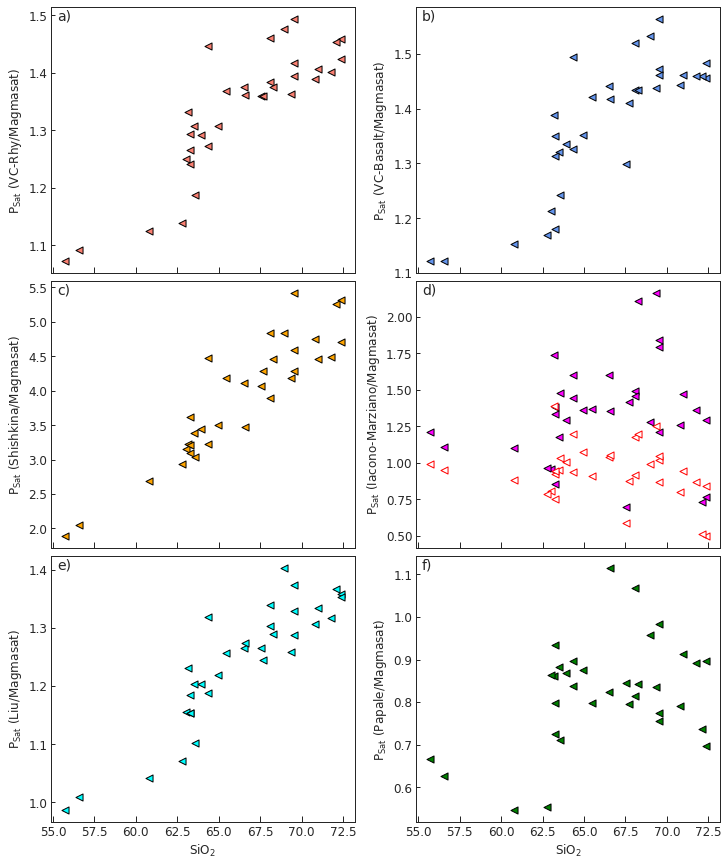

In [28]:
fig, ((ax3, ax2), (ax1, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12,15), sharex=True) #, sharex=ax1, ax2, ax3, sharey=True) # adjust dimensions of figure here
#ax1.scatter(satPs_wtemps_Shish['SiO2'], satPs_wtemps_Shish['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='orange', edgecolor='black', s=50)
ax1.scatter(satPs_wtemps_Shish_Atlas['SiO2'], satPs_wtemps_Shish_Atlas['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='orange', edgecolor='black', s=50, marker='<')

ax1.set_ylabel('P$_{Sat}$ (Shishkina/Magmasat)')

#ax2.scatter(satPs_wtemps_Dixon['SiO2'], satPs_wtemps_Dixon['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='blue', edgecolor='black', s=50)
ax2.scatter(satPs_wtemps_Dixon_Atlas['SiO2'], satPs_wtemps_Dixon_Atlas['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='cornflowerblue', edgecolor='black', s=50, marker='<')
ax2.set_ylabel('P$_{Sat}$ (VC-Basalt/Magmasat)')

#ax3.scatter(satPs_wtemps_Magmasat['SiO2'], dataCassidy['SatPRhyoliteVolatileCalc']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='red', edgecolor='black', s=50)
ax3.scatter(satPs_wtemps_Magmasat_Atlas['SiO2'], dataAtlas['SatPRhyoliteVolatileCalc']/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='salmon', edgecolor='black', s=50, marker='<')
ax3.set_ylabel('P$_{Sat}$ (VC-Rhy/Magmasat)')

#ax4.scatter(satPs_wtemps_Magmasat['SiO2'], satPs_wtemps_IM['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='magenta', edgecolor='black', s=50)
ax4.scatter(satPs_wtemps_Magmasat_Atlas['SiO2'], satPs_wtemps_IM_Atlas['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='magenta', edgecolor='black', s=50, marker='<')
ax4.scatter(satPs_wtemps_Magmasat_Atlas['SiO2'], satPs_wtemps_IM_Atlas_An['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, edgecolor='red', facecolor='white', s=50, marker='<')

ax4.set_ylabel('P$_{Sat}$ (Iacono-Marziano/Magmasat)')

#ax5.scatter(satPs_wtemps_Shish['SiO2'], satPs_wtemps_Liu['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='cyan', edgecolor='black', s=50)
ax5.scatter(satPs_wtemps_Shish_Atlas['SiO2'], satPs_wtemps_Liu_Atlas['SaturationP_bars_VESIcal'].values/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='cyan', edgecolor='black', s=50, marker='<')
ax5.set_ylabel('P$_{Sat}$ (Liu/Magmasat)')
ax5.set_xlabel('SiO$_2$')

#ax6.scatter(dataCassidy['SiO2'], 10*dataCassidy['PapaleWebApp(MPA)']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values, facecolor='red', edgecolor='black', s=50)
ax6.scatter(dataAtlas['SiO2'], 10*dataAtlas['PapaleWebApp(MPA)']/satPs_wtemps_Magmasat_Atlas['SaturationP_bars_VESIcal'].values, facecolor='green', edgecolor='black', s=50, marker='<')
ax6.set_ylabel('P$_{Sat}$ (Papale/Magmasat)')
ax6.set_xlabel('SiO$_2$')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.2, hspace=0.03)
ax3.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax4.annotate("d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax5.annotate("e)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax6.annotate("f)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

fig.savefig('SupFig_Atlas_reftoMagmasat.svg', transparent=True)


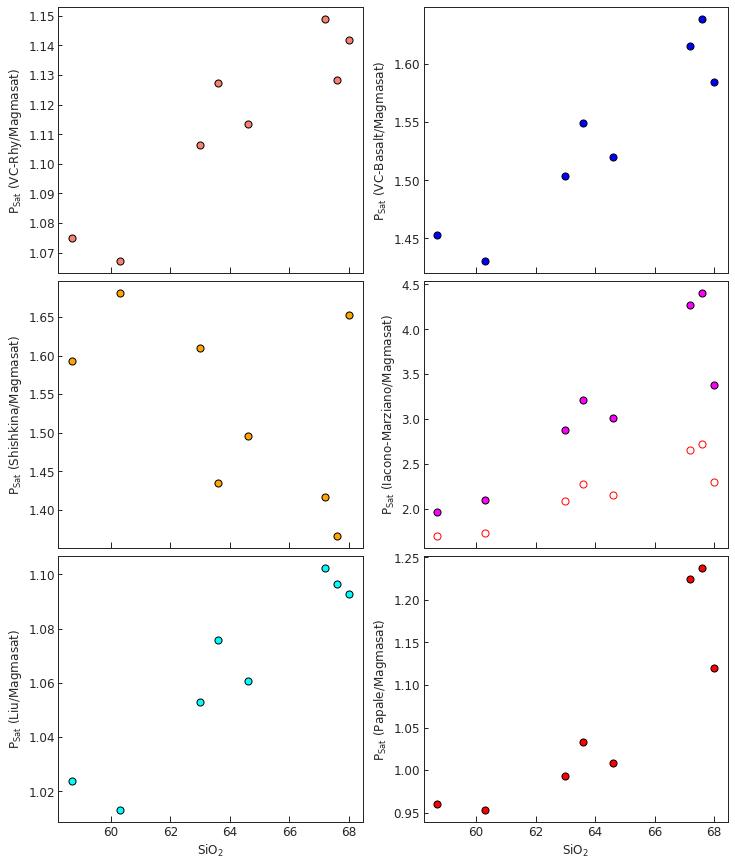

In [29]:
fig, ((ax3, ax2), (ax1, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12,15), sharex=True) #, sharex=ax1, ax2, ax3, sharey=True) # adjust dimensions of figure here
ax1.scatter(satPs_wtemps_Shish['SiO2'], satPs_wtemps_Shish['SaturationP_bars_VESIcal']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='orange', edgecolor='black', s=50)

ax1.set_ylabel('P$_{Sat}$ (Shishkina/Magmasat)')

ax2.scatter(satPs_wtemps_Dixon['SiO2'], satPs_wtemps_Dixon['SaturationP_bars_VESIcal']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='blue', edgecolor='black', s=50)
ax2.set_ylabel('P$_{Sat}$ (VC-Basalt/Magmasat)')

ax3.scatter(satPs_wtemps_Magmasat['SiO2'], dataCassidy['SatPRhyoliteVolatileCalc']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='salmon', edgecolor='black', s=50)
ax3.set_ylabel('P$_{Sat}$ (VC-Rhy/Magmasat)')

ax4.scatter(satPs_wtemps_Magmasat['SiO2'], satPs_wtemps_IM['SaturationP_bars_VESIcal']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='magenta', edgecolor='black', s=50)
ax4.scatter(satPs_wtemps_Magmasat['SiO2'], satPs_wtemps_IM_An['SaturationP_bars_VESIcal']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='white', edgecolor='red', s=50)

ax4.set_ylabel('P$_{Sat}$ (Iacono-Marziano/Magmasat)')

ax5.scatter(satPs_wtemps_Shish['SiO2'], satPs_wtemps_Liu['SaturationP_bars_VESIcal']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='cyan', edgecolor='black', s=50)
ax5.set_ylabel('P$_{Sat}$ (Liu/Magmasat)')
ax5.set_xlabel('SiO$_2$')

ax6.scatter(dataCassidy['SiO2'], 10*dataCassidy['PapaleWebApp(MPA)']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], facecolor='red', edgecolor='black', s=50)
ax6.set_ylabel('P$_{Sat}$ (Papale/Magmasat)')
ax6.set_xlabel('SiO$_2$')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.2, hspace=0.03)
fig.savefig('Cassidy_reftoMagmasat.svg', transparent=True)



# Isobars

In [30]:
VCRIsobars= pd.read_excel(r'../Figure_17_comp_vs_cali/Andesite_MIs_Calibration_Data.xlsx', sheet_name='VolatileCalc_Rhyolite_Isobars')
PapaleIsobars= pd.read_excel(r'../Figure_17_comp_vs_cali/Andesite_MIs_Calibration_Data.xlsx', sheet_name='PapaleIsobars')

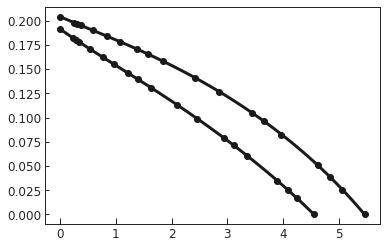

In [31]:
x_Atlas=PapaleIsobars.loc[PapaleIsobars['Sample']=="Atlas_1050_1470", 'Diss H2O']
y_Atlas=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Atlas_1050_1470", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_Atlas, y_Atlas, 5))
P_x_Atlas_new = np.linspace(min(x_Atlas), max(x_Atlas), 50)
P_y_Atlas_new = Pf(P_x_Atlas_new)
plt.plot(x_Atlas, y_Atlas, '.k')
plt.plot(P_x_Atlas_new, P_y_Atlas_new, '-k')

x_Cassidy=PapaleIsobars.loc[PapaleIsobars['Sample']=="Cassidy_1000_2160", 'Diss H2O']
y_Cassidy=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Cassidy_1000_2160", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_Cassidy, y_Cassidy, 5))
P_x_Cassidy_new = np.linspace(min(x_Cassidy), max(x_Cassidy), 50)
P_y_Cassidy_new = Pf(P_x_Cassidy_new)
plt.plot(x_Cassidy, y_Cassidy, '.k')
plt.plot(P_x_Cassidy_new, P_y_Cassidy_new, '-k')




/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


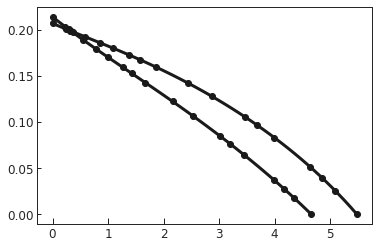

In [32]:
x_Atlas_noFe3=PapaleIsobars.loc[PapaleIsobars['Sample']=="Atlas_1050_1470_noFe3", 'Diss H2O']
y_Atlas_noFe3=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Atlas_1050_1470_noFe3", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_Atlas_noFe3, y_Atlas_noFe3, 5))
P_x_Atlas_noFe3_new = np.linspace(min(x_Atlas_noFe3), max(x_Atlas_noFe3), 50)
P_y_Atlas_noFe3_new = Pf(P_x_Atlas_noFe3_new)
plt.plot(x_Atlas_noFe3, y_Atlas_noFe3, '.k')
plt.plot(P_x_Atlas_noFe3_new, P_y_Atlas_noFe3_new, '-k')

x_Cassidy_noFe3=PapaleIsobars.loc[PapaleIsobars['Sample']=="Cassidy_1000_2160_noFe3", 'Diss H2O']
y_Cassidy_noFe3=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Cassidy_1000_2160_noFe3", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_Cassidy_noFe3, y_Cassidy_noFe3, 5))
P_x_Cassidy_noFe3_new = np.linspace(min(x_Cassidy_noFe3), max(x_Cassidy_noFe3), 50)
P_y_Cassidy_noFe3_new = Pf(P_x_Cassidy_noFe3_new)
plt.plot(x_Cassidy_noFe3, y_Cassidy_noFe3, '.k')
plt.plot(P_x_Cassidy_noFe3_new, P_y_Cassidy_noFe3_new, '-k')




In [33]:
"""To get composition from a specific sample in the input data:"""
bulk_comp_SSH5B_1 = Cassidy.get_sample_composition('SSH5B_1', asSampleClass=True)
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1000

"""Define a list of pressures in bars:"""
pressures = [2160]

MagmaSat_isobars_SSH5B_1, MagmaSat_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_SSH5B_1 = v.vplot.smooth_isobars_and_isopleths(MagmaSat_isobars_SSH5B_1)

Shish_isobars_SSH5B_1, Shish_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature, model="ShishkinaIdealMixing",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

Liu_isobars_SSH5B_1, Liu_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature, model="Liu",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

Dixon_isobars_SSH5B_1, Dixon_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature, model="Dixon",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

IM_H_isobars_SSH5B_1, IM_H_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature, model="IaconoMarziano",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

IM_A_isobars_SSH5B_1, IM_A_isopleths_SSH5B_1 = v.calculate_isobars_and_isopleths(sample=bulk_comp_SSH5B_1, smooth_isobars=False,
                                            temperature=temperature, model="IaconoMarziano", coeffs="anhydrous",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating isobar at 2160 bars
 done.                                                                                                                           
Done!


/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: temperature (1000.0 oC) is outside the calibration range of Shishkina et al. water (1050.0-1400.0 oC). Note, the authors recomend that this model is optimally calibrated between 1150-1250C. temperature (1000.0 oC) is outside the calibration range of the Shishkina et al. carbon model (1200.0-1300.0 oC). 
  w.warn(self.calib_check, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning:  These calibration limits were selected based on the minimum and maximum values of these oxides (+-5%) in the combined Water and Carbon calibration dataset. As the Liu et al. model incorperates no term for compositional dependence, users must take extreme care when extrapolating this model to compositions which differ significantly from the haplogranites and rhyolites in the calibration dataset. These warnings are simply a guide; we suggest that users carefully compare th

In [34]:
"""To get composition from a specific sample in the input data:"""
bulk_comp_Sample2 = Atlas.get_sample_composition('Sample2', asSampleClass=True)
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1050

"""Define a list of pressures in bars:"""
pressures = [1470]

MagmaSat_isobars_Sample2, MagmaSat_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_Sample2 = v.vplot.smooth_isobars_and_isopleths(MagmaSat_isobars_Sample2)

Shish_isobars_Sample2, Shish_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature, model="ShishkinaIdealMixing",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

Liu_isobars_Sample2, Liu_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature, model="Liu",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

Dixon_isobars_Sample2, Dixon_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature, model="Dixon",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

IM_H_isobars_Sample2, IM_H_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature, model="IaconoMarziano",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

IM_A_isobars_Sample2, IM_A_isopleths_Sample2 = v.calculate_isobars_and_isopleths(sample=bulk_comp_Sample2, smooth_isobars=False,
                                            temperature=temperature, model="IaconoMarziano", coeffs="anhydrous",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating isobar at 1470 bars
 done.                                                                                                                           
Done!


/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: temperature (1050.0 oC) is outside the calibration range of the Shishkina et al. carbon model (1200.0-1300.0 oC). 
  w.warn(self.calib_check, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning:  These calibration limits were selected based on the minimum and maximum values of these oxides (+-5%) in the combined Water and Carbon calibration dataset. As the Liu et al. model incorperates no term for compositional dependence, users must take extreme care when extrapolating this model to compositions which differ significantly from the haplogranites and rhyolites in the calibration dataset. These warnings are simply a guide; we suggest that users carefully compare their major element data to the calibration dataset to check for suitability 
  w.warn(self.calib_check, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60:

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-fa902eb33b13>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(P_x_Cassidy_noFe3_new, P_y_Cassidy_noFe3_new, '-', color='green', linewidth=b, linestyle='dashed')


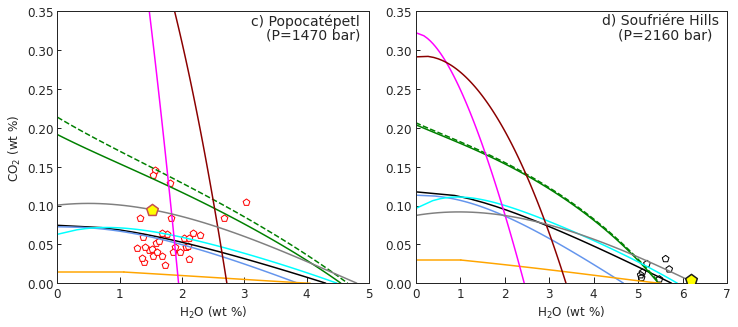

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5)) #, sharex=ax1, ax2, ax3, sharey=True) # adjust dimensions of figure here
############# ATlas isobar
b=1.5

# VCR
ax1.plot(VCRIsobars['Wt%H2O_1470bars_1050C'], 10**(-4)*VCRIsobars['PPMCO2_1470bars_1050C'], '-', color='black', linewidth=b)
ax2.plot(VCRIsobars['Wt%H2Oc_2160bars_1000C'], 10**(-4)*VCRIsobars['PPMCO2_2160bars_1000C'], '-', color='black', linewidth=b)
# Papale
ax2.plot(P_x_Cassidy_new, P_y_Cassidy_new, '-',  color='green',linewidth=b)
ax2.plot(P_x_Cassidy_noFe3_new, P_y_Cassidy_noFe3_new, '-', color='green', linewidth=b, linestyle='dashed')

ax1.plot(P_x_Atlas_new, P_y_Atlas_new, '-',  color='green',linewidth=b)
ax1.plot(P_x_Atlas_noFe3_new, P_y_Atlas_noFe3_new,  color='green', linewidth=b, linestyle='dashed')
# Dixon
ax1.plot(Dixon_isobars_Sample2['H2O_liq'], Dixon_isobars_Sample2['CO2_liq'], '-', color='cornflowerblue',  linewidth=b)
ax2.plot(Dixon_isobars_SSH5B_1['H2O_liq'], Dixon_isobars_SSH5B_1['CO2_liq'], '-', color='cornflowerblue',  linewidth=b)
# Liu
ax1.plot(Liu_isobars_Sample2['H2O_liq'], Liu_isobars_Sample2['CO2_liq'], '-', color='cyan',  linewidth=b)
ax2.plot(Liu_isobars_SSH5B_1['H2O_liq'], Liu_isobars_SSH5B_1['CO2_liq'], '-', color='cyan',  linewidth=b)
# Shish
ax1.plot(Shish_isobars_Sample2['H2O_liq'], Shish_isobars_Sample2['CO2_liq'], '-', color='orange',  linewidth=b)
ax2.plot(Shish_isobars_SSH5B_1['H2O_liq'], Shish_isobars_SSH5B_1['CO2_liq'], '-', color='orange',  linewidth=b)

ax1.plot([0, Shish_isobars_Sample2['H2O_liq'].iloc[0]],
         [Shish_isobars_Sample2['CO2_liq'].iloc[0], Shish_isobars_Sample2['CO2_liq'].iloc[0]], '-', color='orange',  linewidth=b)
ax2.plot([0, Shish_isobars_SSH5B_1['H2O_liq'].iloc[0]],
         [Shish_isobars_SSH5B_1['CO2_liq'].iloc[0], Shish_isobars_SSH5B_1['CO2_liq'].iloc[0]], '-', color='orange',  linewidth=b)

# IM_H
ax1.plot(IM_H_isobars_Sample2['H2O_liq'], IM_H_isobars_Sample2['CO2_liq'], '-', color='magenta',  linewidth=b)
ax2.plot(IM_H_isobars_SSH5B_1['H2O_liq'], IM_H_isobars_SSH5B_1['CO2_liq'], '-', color='magenta',  linewidth=b)
# IM_A
ax1.plot(IM_A_isobars_Sample2['H2O_liq'], IM_A_isobars_Sample2['CO2_liq'], '-', color='darkred',  linewidth=b)
ax2.plot(IM_A_isobars_SSH5B_1['H2O_liq'], IM_A_isobars_SSH5B_1['CO2_liq'], '-', color='darkred',  linewidth=b)


# MagmaSat
ax1.plot(smoothed_isobars_Sample2['H2O_liq'], smoothed_isobars_Sample2['CO2_liq'], '-', color='grey',  linewidth=b)
ax2.plot(smoothed_isobars_SSH5B_1['H2O_liq'], smoothed_isobars_SSH5B_1['CO2_liq'], '-', color='grey',  linewidth=b)

# Data
ax2.scatter(dataCassidy['H2O'], dataCassidy['CO2'], edgecolor='black', facecolor='none', s=50, marker='p', linewidth=1)
ax2.scatter(dataCassidy['H2O'].iloc[3], dataCassidy['CO2'].iloc[3],  marker='p', facecolor='yellow', edgecolor='k', s=150, zorder=100, linewidth=1.5)

ax1.scatter(dataAtlas['H2O'], dataAtlas['CO2'], edgecolor='red', facecolor='white', s=50, marker='p', linewidth=1)
ax1.scatter(dataAtlas['H2O'].iloc[1], dataAtlas['CO2'].iloc[1],  marker='p', facecolor='yellow', edgecolor='r', s=150, zorder=100, linewidth=1.5)


ax2.annotate("d) Soufriére Hills", xy=(0.6, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("c) Popocatépetl", xy=(0.62, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("(P=2160 bar)", xy=(0.65, 0.9), xycoords="axes fraction", fontsize=14)
ax1.annotate("(P=1470 bar)", xy=(0.67, 0.9), xycoords="axes fraction", fontsize=14)

plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.15, hspace=0.03)
# ax2.set_xlim([-0.3, 7])
# ax2.set_ylim([-0.02, 0.35])
# ax1.set_ylim([-0.02, 0.35])
ax2.set_xlim([0, 7])
ax1.set_xlim([0, 5])
ax2.set_ylim([0, 0.35])
ax1.set_ylim([0, 0.35])
ax1.set_ylabel('CO$_2$ (wt %)')
ax2.set_xlabel('H$_2$O (wt %)')
ax1.set_xlabel('H$_2$O (wt %)')
fig.savefig('Fig17_Andesite_Isobar_Issues.svg')